In [12]:
import pandas as pd
import numpy
import json


file_mode = "../data/ACTU_STOPS_0.csv"
file_trips = "../data/gtfs3Sept/trips.csv"
file_routes = "../data/gtfs3Sept/routes.csv"
file_stop_times = "../data/gtfs3Sept/stop_times.csv"
file_stops = "../data/gtfs3Sept/stops.csv"
file_calendar = "../data/gtfs3Sept/calendar.csv"

In [13]:
# df_stops = pd.read_csv(file_stops)

In [76]:
"""
creation of the metro trips dataset
"""
df_mode = pd.read_csv(file_mode)
df_trips = pd.read_csv(file_trips)
df_routes = pd.read_csv(file_routes)

# recuperates all the metro lines number
df_mode_metro = df_mode.numero_lig[df_mode["mode"]=="M"].astype(str).unique()
print(df_mode_metro)



['1' '2' '5' '6']


In [78]:
# gets all the route_id corresponding to the metro line number
df_routes_metro = df_routes[df_routes.route_short_name.isin(df_mode_metro)]
print(df_routes_metro)



   route_id route_short_name            route_long_name  route_desc  \
0         2                1  GARE DE L'OUEST - STOCKEL         NaN   
1         4                2        SIMONIS - ELISABETH         NaN   
4         1                5  ERASME - HERRMANN-DEBROUX         NaN   
5         3                6   ROI BAUDOUIN - ELISABETH         NaN   

   route_type  route_url route_color route_text_color  
0           1        NaN      C4008F           FFFFFF  
1           1        NaN      F57000           FFFFFF  
4           1        NaN      E6B012           FFFFFF  
5           1        NaN      0078AD           FFFFFF  


In [72]:
df_metro_trips = df_trips[df_trips.route_id.isin(df_routes_metro.route_id)] # we only keep the trip in df_trips associated to the metro lines
df_metro_trips = df_metro_trips.drop(["trip_headsign", "block_id", "shape_id"], axis=1)
print(df_metro_trips)

       route_id  service_id             trip_id  direction_id
80299         1   234578052  112585711234578052             1
80300         1   234578052  112585712234578052             1
80301         1   234578052  112585714234578052             0
80302         1   234578052  112585715234578052             0
80303         1   234578052  112585717234578052             1
...         ...         ...                 ...           ...
88833         1   237269601  113423843237269601             1
88834         1   237269601  113423845237269601             0
88835         1   237269601  113423847237269601             1
88836         1   237269601  113423849237269601             0
88837         1   237269601  113423851237269601             1

[8539 rows x 4 columns]


In [104]:
"""
filtering the calendar dataset in week, saturday, sunday
"""
df_calendar = pd.read_csv(file_calendar)
df_calendar["week"] = df_calendar['monday']*df_calendar['tuesday']*df_calendar['wednesday']*df_calendar['thursday']*df_calendar['friday']
df_calendar.drop(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'end_date'], inplace=True, axis=1)

print(df_calendar)

     service_id  saturday  sunday  start_date  week
0     234578052         0       0    20210823     1
1     236986502         1       0    20210828     0
2     236988602         0       1    20210829     0
3     236270000         0       0    20210901     1
4     236269500         1       0    20210904     0
..          ...       ...     ...         ...   ...
432   237102501         1       0    20210911     0
433   237472602         0       1    20210912     0
434   237451600         0       1    20210905     0
435   238036502         1       0    20210918     0
436   238255501         1       0    20210919     0

[437 rows x 5 columns]


In [105]:
"""
joining calendar and metro trip
"""
df_metro_trip_calendar = pd.merge(df_metro_trips, df_calendar, on="service_id")
print(df_metro_trip_calendar)

      route_id  service_id             trip_id  direction_id  saturday  \
0            1   234578052  112585711234578052             1         0   
1            1   234578052  112585712234578052             1         0   
2            1   234578052  112585714234578052             0         0   
3            1   234578052  112585715234578052             0         0   
4            1   234578052  112585717234578052             1         0   
...        ...         ...                 ...           ...       ...   
8534         1   237269601  113423843237269601             1         0   
8535         1   237269601  113423845237269601             0         0   
8536         1   237269601  113423847237269601             1         0   
8537         1   237269601  113423849237269601             0         0   
8538         1   237269601  113423851237269601             1         0   

      sunday  start_date  week  
0          0    20210823     1  
1          0    20210823     1  
2          0

In [106]:
"""
merging stop_times and metro_trip_calendar
"""
df_stop_times = pd.read_csv(file_stop_times)
df_stop_times.drop(["pickup_type", "drop_off_type"], inplace=True, axis=1)
df_metro_time = pd.merge(df_metro_trip_calendar, df_stop_times, on="trip_id")
print(df_metro_time)


        route_id  service_id             trip_id  direction_id  saturday  \
0              1   234578052  112585711234578052             1         0   
1              1   234578052  112585711234578052             1         0   
2              1   234578052  112585711234578052             1         0   
3              1   234578052  112585711234578052             1         0   
4              1   234578052  112585711234578052             1         0   
...          ...         ...                 ...           ...       ...   
199764         1   237269601  113423851237269601             1         0   
199765         1   237269601  113423851237269601             1         0   
199766         1   237269601  113423851237269601             1         0   
199767         1   237269601  113423851237269601             1         0   
199768         1   237269601  113423851237269601             1         0   

        sunday  start_date  week arrival_time departure_time stop_id  \
0            0 

In [18]:
print(df_metro_time.stop_id.unique())
print(len(df_metro_time.stop_id.unique()))

['8743' '8731' '8721' '8711' '8701' '8691' '8681' '8671' '8661' '8651'
 '8642' '8641' '8652' '8662' '8672' '8682' '8692' '8702' '8712' '8722'
 '8732' '8742' '8292' '8282' '8272' '8012' '8022' '8032' '8042' '8052'
 '8062' '8072' '8202' '8212' '8222' '8232' '8242' '8252' '8262' '8231'
 '8221' '8211' '8201' '8071' '8061' '8051' '8041' '8031' '8021' '8011'
 '8271' '8281' '8291' '8741' '8251' '8241' '8261' '8161' '8151' '8141'
 '8131' '8121' '8111' '8101' '8091' '8081' '8162' '8733' '8082' '8092'
 '8102' '8112' '8122' '8132' '8142' '8152' '8471' '8461' '8441' '8431'
 '8421' '8411' '8401' '8301' '8311' '8321' '8331' '8341' '8351' '8361'
 '8371' '8381' '8753' '8763' '8773' '8783' '8793' '8803' '8813' '8823'
 '8834' '8833' '8824' '8814' '8804' '8794' '8784' '8774' '8764' '8754'
 '8744' '8382' '8372' '8362' '8352' '8342' '8332' '8322' '8312' '8302'
 '8402' '8412' '8422' '8432' '8442' '8462' '8472']
127


In [107]:

def time_to_sec(time:str):
    time = time.split(":")
    hours, minutes, seconds = int(time[0]), int(time[1]), int(time[2])
    return hours*60*60+minutes*60+seconds




temp = []
for i in range(len(df_metro_time)):
    if df_metro_time.stop_id[i] == "8731" and  df_metro_time.direction_id[i] == 1 and df_metro_time.week[i] == 1 and df_metro_time.route_id[i] == 1 and df_metro_time.start_date[i] == 20210823: #df_metro_time.direction_id[i] == 1
        temp.append(df_metro_time.arrival_time[i])

temp.sort()
print(temp)
for i in range(len(temp)):
    temp[i] = time_to_sec(temp[i])
print(temp)

time_diff = []
x = []
y = []

for i in range(len(temp)-1):
    # if round((temp[i+1]-temp[i])/60, 2):
        x.append(round(temp[i]/3600, 2))
        y.append(round((temp[i+1]-temp[i])/60, 2))

['05:10:23', '05:17:15', '05:26:24', '05:33:39', '05:51:02', '06:00:20', '06:11:46', '06:15:53', '06:23:52', '06:32:27', '06:36:05', '06:43:48', '06:50:11', '06:56:11', '07:02:11', '07:08:11', '07:14:11', '07:20:11', '07:26:11', '07:32:11', '07:38:11', '07:44:11', '07:50:11', '07:56:11', '08:02:11', '08:08:11', '08:14:11', '08:20:11', '08:26:11', '08:32:11', '08:38:11', '08:44:11', '08:50:11', '08:56:11', '09:02:11', '09:08:11', '09:14:11', '09:20:11', '09:26:27', '09:32:43', '09:38:47', '09:45:17', '09:51:22', '09:57:22', '10:03:22', '10:09:22', '10:15:22', '10:21:22', '10:27:22', '10:33:19', '10:38:57', '10:44:39', '10:51:47', '10:59:47', '11:07:17', '11:14:47', '11:22:17', '11:29:47', '11:37:17', '11:44:47', '11:52:17', '11:59:47', '12:07:17', '12:14:47', '12:22:17', '12:29:47', '12:37:17', '12:44:47', '12:52:17', '12:59:47', '13:07:17', '13:14:47', '13:22:17', '13:29:47', '13:37:17', '13:44:47', '13:52:17', '13:59:47', '14:07:17', '14:14:47', '14:22:17', '14:29:47', '14:37:17', '14

In [108]:
print(x)

[5.17, 5.29, 5.44, 5.56, 5.85, 6.01, 6.2, 6.26, 6.4, 6.54, 6.6, 6.73, 6.84, 6.94, 7.04, 7.14, 7.24, 7.34, 7.44, 7.54, 7.64, 7.74, 7.84, 7.94, 8.04, 8.14, 8.24, 8.34, 8.44, 8.54, 8.64, 8.74, 8.84, 8.94, 9.04, 9.14, 9.24, 9.34, 9.44, 9.55, 9.65, 9.75, 9.86, 9.96, 10.06, 10.16, 10.26, 10.36, 10.46, 10.56, 10.65, 10.74, 10.86, 11.0, 11.12, 11.25, 11.37, 11.5, 11.62, 11.75, 11.87, 12.0, 12.12, 12.25, 12.37, 12.5, 12.62, 12.75, 12.87, 13.0, 13.12, 13.25, 13.37, 13.5, 13.62, 13.75, 13.87, 14.0, 14.12, 14.25, 14.37, 14.5, 14.62, 14.75, 14.84, 14.87, 15.0, 15.13, 15.22, 15.25, 15.37, 15.48, 15.57, 15.65, 15.74, 15.83, 15.92, 16.01, 16.1, 16.19, 16.28, 16.37, 16.45, 16.54, 16.63, 16.72, 16.81, 16.9, 16.99, 17.08, 17.17, 17.25, 17.34, 17.43, 17.52, 17.61, 17.7, 17.79, 17.88, 17.97, 18.05, 18.14, 18.23, 18.32, 18.41, 18.5, 18.59, 18.68, 18.77, 18.85, 18.94, 19.03, 19.12, 19.21, 19.3, 19.41, 19.53, 19.63, 19.75, 19.86, 19.98, 20.1, 20.21, 20.33, 20.45, 20.56, 20.68, 20.8, 20.92, 21.09, 21.26, 21.42

In [109]:
print(y)

[6.87, 9.15, 7.25, 17.38, 9.3, 11.43, 4.12, 7.98, 8.58, 3.63, 7.72, 6.38, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.27, 6.27, 6.07, 6.5, 6.08, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.95, 5.63, 5.7, 7.13, 8.0, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 5.62, 1.87, 7.98, 7.43, 5.82, 1.75, 7.03, 6.25, 5.38, 5.32, 5.35, 5.37, 5.3, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 6.9, 7.0, 6.03, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.62, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 5.0, 15.0, 20.0]


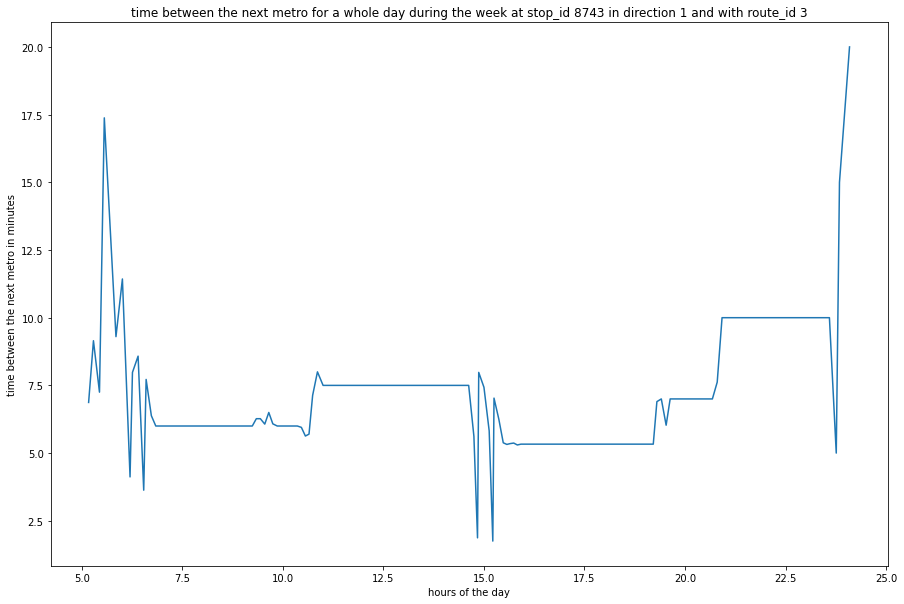

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.plot(x, y)
# naming the x axis
plt.xlabel('hours of the day')
# naming the y axis
plt.ylabel('time between the next metro in minutes')
plt.title('time between the next metro for a whole day during the week at stop_id 8743 in direction 1 and with route_id 3')
plt.show()